In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

%cd ../..

!hostname

/p/fastdata/pli/Private/oberstrass1/datasets/vervet1818-3d
jrlogin02.jureca


In [42]:
# Show kmeans superpixel

kmeans_path = "data/aa/volume/kmeans_pca80_s1_128/resnet50_planes8_962-1083_sphere_small/kmeans_pca80_s1_128.h5"

###

import h5py as h5

with h5.File(kmeans_path, 'r') as f:
    kmeans_volume = f['volume'][:]
    kmeans_spacing = f['affine'][:].diagonal()[:3]

mask_volume = kmeans_volume != 0

kmeans_volume = kmeans_volume[70:-20, :, 50:-50]
mask_volume = mask_volume[70:-20, :, 50:-50]

cmax = kmeans_volume.max()

kmeans_volume.shape, kmeans_spacing

((358, 121, 385), array([0.0843776, 0.06     , 0.0843776]))

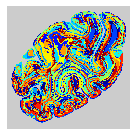

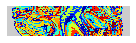

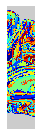

In [48]:
cmap = "jet"

out_path = "doc/clusters/"

resolution = 0.0843776  # in mm


figsize = (2., 2.)

mid0 = kmeans_volume.shape[0] // 2
mid1 = kmeans_volume.shape[1] // 2
mid2 = kmeans_volume.shape[2] // 2

###

import numpy as np
from skimage.transform import rescale


scale = tuple(s / resolution for s in kmeans_spacing)



im0 = np.transpose(kmeans_volume[:, :, mid2])[::-1, ::-1]
im0 = rescale(im0, scale=(scale[1], scale[0]), anti_aliasing=False, preserve_range=True, order=0).astype(np.uint8)

mask0 = np.transpose(mask_volume[:, :, mid2])[::-1, ::-1]
mask0 = rescale(mask0, scale=(scale[1], scale[0]), anti_aliasing=False, preserve_range=True, order=0).astype(bool)

im1 = np.transpose(kmeans_volume[mid0, :, :])[::-1, ::-1]
im1 = rescale(im1, scale=(scale[2], scale[1]), anti_aliasing=False, preserve_range=True, order=0).astype(np.uint8)

mask1 = np.transpose(mask_volume[mid0, :, :])[::-1, ::-1]
mask1 = rescale(mask1, scale=(scale[2], scale[1]), anti_aliasing=False, preserve_range=True, order=0).astype(np.uint8)

im2 = np.transpose(kmeans_volume[:, mid1, :])[::-1, ::-1]
im2 = rescale(im2, scale=(scale[2], scale[0]), anti_aliasing=False, preserve_range=True, order=0).astype(np.uint8)

mask2 = np.transpose(mask_volume[:, mid1, :])[::-1, ::-1]
mask2 = rescale(mask2, scale=(scale[2], scale[0]), anti_aliasing=False, preserve_range=True, order=0).astype(np.uint8)

im0.shape, im1.shape, im2.shape

import os
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

mask_map = plt.cm.colors.ListedColormap([(0.8, 0.8, 0.8, 1.0), (1, 1, 1, 0)])

plt.figure(figsize=figsize)
plt.imshow(im2, cmap=cmap, vmin=1, vmax=cmax, interpolation='nearest', extent=[0, figsize[0], 0, figsize[1]])
plt.imshow(mask2, cmap=mask_map, interpolation='nearest', extent=[0, figsize[0], 0, figsize[1]])
plt.axis('off')
plt.tight_layout()
plt.savefig(os.path.join(out_path, "kmeans_128_2.svg"), dpi=400)
plt.show()

plt.figure(figsize=figsize)
plt.imshow(im0, cmap=cmap, vmin=1, vmax=cmax, interpolation='nearest', extent=[0, figsize[0], 0, (im0.shape[0] / im0.shape[1]) * figsize[1]])
plt.imshow(mask0, cmap=mask_map, interpolation='nearest', extent=[0, figsize[0], 0, (im0.shape[0] / im0.shape[1]) * figsize[1]])
plt.axis('off')
plt.tight_layout()
plt.savefig(os.path.join(out_path, "kmeans_128_0.svg"), dpi=400)
plt.show()

plt.figure(figsize=figsize)
plt.imshow(im1, cmap=cmap, vmin=1, vmax=cmax, interpolation='nearest', extent=[0, (im1.shape[1] / im1.shape[0]) * figsize[0], 0, figsize[1]])
plt.imshow(mask1, cmap=mask_map, interpolation='nearest', extent=[0, (im1.shape[1] / im1.shape[0]) * figsize[0], 0, figsize[1]])
plt.axis('off')
plt.tight_layout()
plt.savefig(os.path.join(out_path, "kmeans_128_1.svg"), dpi=400)
plt.show()

/tmp/ipykernel_31715/3968334511.py:17: UserWarning: Trying to register the cmap 'glasbey' which already exists.
  plt.register_cmap(cmap=LinearSegmentedColormap.from_list('glasbey', color_palette, N=len(color_palette)))


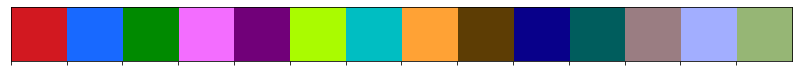

In [45]:
n_cluster = [3, 7, 14]

import glasbey
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

color_palette = glasbey.create_palette(palette_size=n_cluster[-1])
#color_palette = glasbey.extend_palette(
#    "tab10",
#    palette_size=max(n_cluster),
#    colorblind_safe=True,
#    # cvd_severity=100
#)

cmap_max = n_cluster[-1]

plt.register_cmap(cmap=LinearSegmentedColormap.from_list('glasbey', color_palette, N=len(color_palette)))

sns.palplot(color_palette)

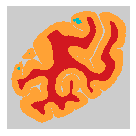

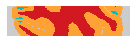

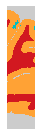

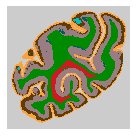

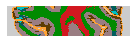

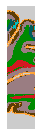

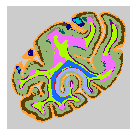

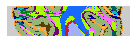

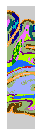

In [49]:
cluster_volume_paths = {
    3: "data/aa/volume/agglomerative_3/resnet50_planes8_962-1083_sphere_small/agglomerative_3.h5",
    7: "data/aa/volume/agglomerative_7/resnet50_planes8_962-1083_sphere_small/agglomerative_7.h5",
    14 : "data/aa/volume/agglomerative_14/resnet50_planes8_962-1083_sphere_small/agglomerative_14.h5",
}

mid0 = kmeans_volume.shape[0] // 2
mid1 = kmeans_volume.shape[1] // 2
mid2 = kmeans_volume.shape[2] // 2


###

for k, cv_path in cluster_volume_paths.items():

    with h5.File(cv_path, 'r') as f:
        cluster_volume = f['volume'][:]
        cluster_spacing = f['affine'][:].diagonal()[:3]

        cluster_volume = cluster_volume[70:-20, :, 50:-50]
        cmax = cluster_volume.max()


    im0 = np.transpose(cluster_volume[:, :, mid2])[::-1, ::-1]
    im0 = rescale(im0, scale=(scale[1], scale[0]), anti_aliasing=False, preserve_range=True, order=0).astype(np.uint8)

    im1 = np.transpose(cluster_volume[mid0, :, :])[::-1, ::-1]
    im1 = rescale(im1, scale=(scale[2], scale[1]), anti_aliasing=False, preserve_range=True, order=0).astype(np.uint8)

    im2 = np.transpose(cluster_volume[:, mid1, :])[::-1, ::-1]
    im2 = rescale(im2, scale=(scale[2], scale[0]), anti_aliasing=False, preserve_range=True, order=0).astype(np.uint8)


    plt.figure(figsize=figsize)
    plt.imshow(im2, cmap='glasbey', interpolation='nearest', vmin=1, vmax=cmap_max, extent=[0, figsize[0], 0, figsize[1]])
    plt.imshow(mask2, cmap=mask_map, interpolation='nearest', extent=[0, figsize[0], 0, figsize[1]])
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(os.path.join(out_path, f"agglomerative_{k}_2.svg"), dpi=400)
    plt.show()

    plt.figure(figsize=figsize)
    plt.imshow(im0, cmap='glasbey', interpolation='nearest', vmin=1, vmax=cmap_max, extent=[0, figsize[0], 0, (im0.shape[0] / im0.shape[1]) * figsize[1]])
    plt.imshow(mask0, cmap=mask_map, interpolation='nearest', extent=[0, figsize[0], 0, (im0.shape[0] / im0.shape[1]) * figsize[1]])
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(os.path.join(out_path, f"agglomerative_{k}_0.svg"), dpi=400)
    plt.show()

    plt.figure(figsize=figsize)
    plt.imshow(im1, cmap='glasbey', interpolation='nearest', vmin=1, vmax=cmap_max, extent=[0, (im1.shape[1] / im1.shape[0]) * figsize[0], 0, figsize[1]])
    plt.imshow(mask1, cmap=mask_map, interpolation='nearest', extent=[0, (im1.shape[1] / im1.shape[0]) * figsize[0], 0, figsize[1]])
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(os.path.join(out_path, f"agglomerative_{k}_1.svg"), dpi=400)
    plt.show()